In [2]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com


In [3]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [8]:
cursor = remote.cursor(buffered=True)

#규모별 경력 학력
sql_1 = """
    SELECT 
    ct.type AS 기업규모,
    ROUND(AVG(co.avg_salary)) AS 평균연봉
FROM 
    company_info co
JOIN 
    comp_type ct ON co.comp_type_id = ct.comp_type_id
WHERE 
    ct.type IS NOT NULL
    AND co.avg_salary IS NOT NULL
    AND co.avg_salary > 0
    AND ct.type != "정보없음"
    AND ct.type != "기타"
GROUP BY 
    ct.type
ORDER BY 
    평균연봉 DESC;

"""

cursor.execute(sql_1)

result = cursor.fetchall()

df = pd.DataFrame(result)

df

,0,1
0,대기업,7077
1,중소기업,5369
2,스타트업,5356
3,중견기업,5077


In [9]:
df.columns = ["기업규모", "평균연봉(천만)"]

df

,기업규모,평균연봉(천만)
0,대기업,7077
1,중소기업,5369
2,스타트업,5356
3,중견기업,5077


In [10]:
# 기업규모 정렬 순서 설정
order = ["스타트업", "중소기업", "중견기업", "대기업"]
df["기업규모"] = pd.Categorical(df["기업규모"], categories=order, ordered=True)

# DataFrame 정렬
df = df.sort_values(by=["기업규모", "평균연봉(천만)"]).reset_index(drop=True)

df

,기업규모,평균연봉(천만)
0,스타트업,5356
1,중소기업,5369
2,중견기업,5077
3,대기업,7077


Text(0.5, 1.0, '기업분류별 분포')

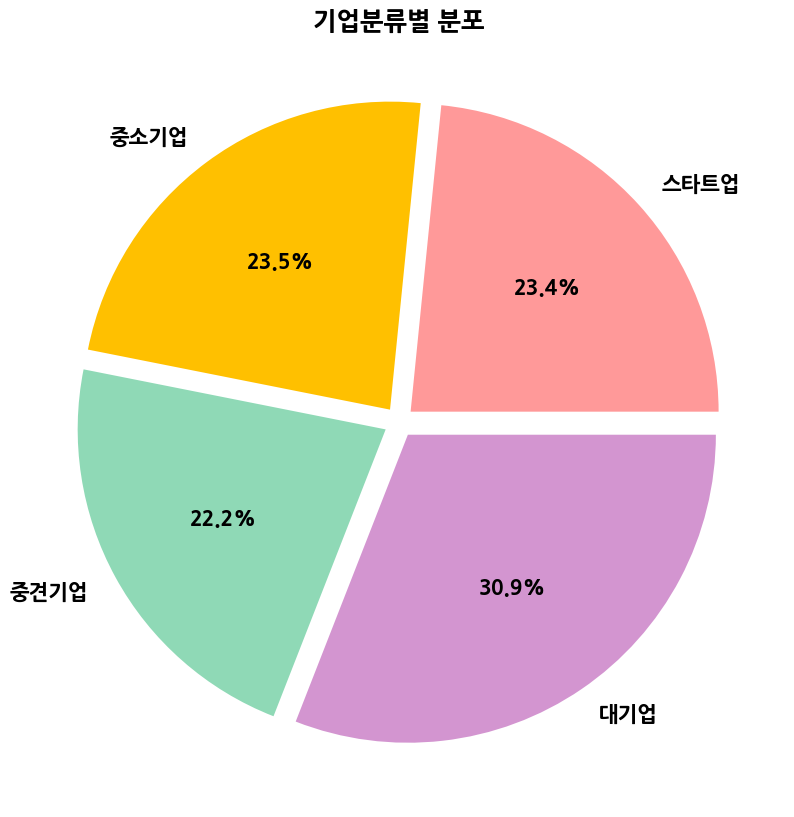

In [12]:
# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 경로 확인 필수
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 그래프 크기 설정
plt.figure(figsize=(10, 10))

# 파이차트 색상 및 explode 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#2E7B26"]
explode = [0.05] * len(df["평균연봉(천만)"])  # 각 항목을 분리

# 파이차트 생성
plt.pie(
    df["평균연봉(천만)"],
    labels=df["기업규모"],
    autopct="%.1f%%",  # 퍼센트 표시
    explode=explode,  # 각 항목 분리
    colors=colors,
    textprops={'fontsize': 15, 'fontweight': 'bold'}  # 텍스트 크기 및 굵기 설정
)

# 그래프 제목 추가
plt.title("기업분류별 분포", fontsize=18, fontweight='bold')

# 그래프 표시

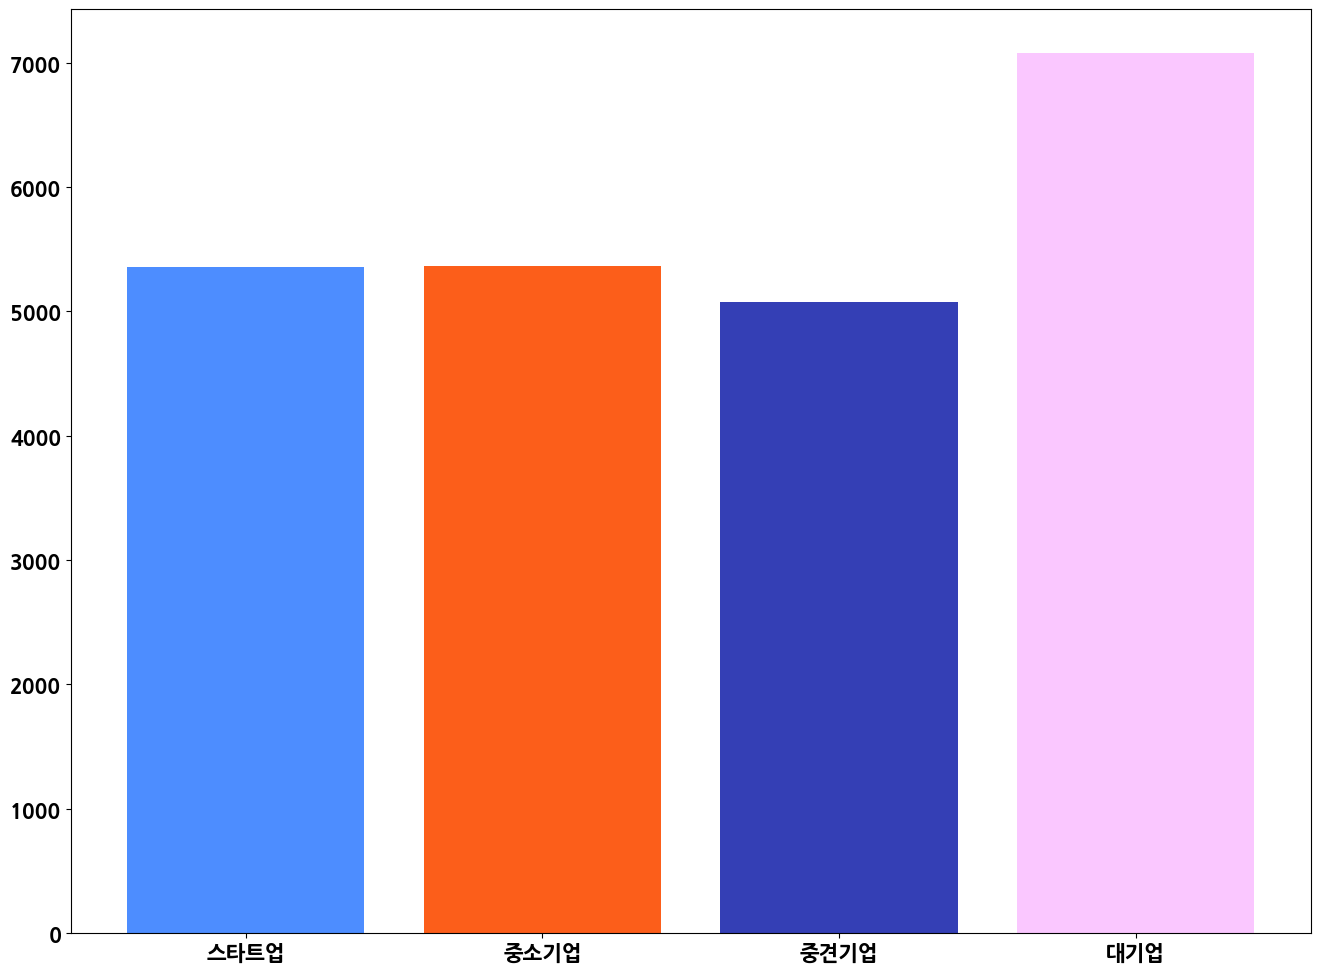

In [13]:
# 한글 폰트 설정 (Linux: NanumGothic)
colors = ["#4D8DFF", "#FC5E1A", "#343FB5", "#FAC7FF", "#43D675"
]

plt.figure(figsize=(16, 12))
plt.bar(df["기업규모"], df["평균연봉(천만)"], color=colors[:len(df)])

plt.xticks(fontsize=15, fontweight="bold")  # x축 레이블 크기
plt.yticks(fontsize=15, fontweight="bold")  # y축 레이블 크기

# plt.title("경력", fontsize = 20, fontweight="bold")

plt.show()

# 박스플롯

In [15]:
cursor = remote.cursor(buffered=True)

#규모별 경력 학력
sql_1 = """
    SELECT 
    ct.type AS 기업규모,
    co.avg_salary AS 평균연봉
FROM 
    company_info co
JOIN 
    comp_type ct ON co.comp_type_id = ct.comp_type_id
WHERE 
    ct.type IS NOT NULL
    AND co.avg_salary IS NOT NULL
    AND co.avg_salary > 0
    AND ct.type != "정보없음"
    AND ct.type != "기타"
ORDER BY 
    평균연봉 DESC;

"""

cursor.execute(sql_1)

result = cursor.fetchall()

df = pd.DataFrame(result)

df

,0,1
0,중소기업,9175
1,중소기업,8982
2,중소기업,8723
3,대기업,8579
4,중소기업,8466
...,...,...
147,중소기업,3126
148,중소기업,3023
149,스타트업,2920
150,중견기업,2813


In [17]:
df.columns = ["기업규모", "평균연봉(천만)"]

df

,기업규모,평균연봉(천만)
0,중소기업,9175
1,중소기업,8982
2,중소기업,8723
3,대기업,8579
4,중소기업,8466
...,...,...
147,중소기업,3126
148,중소기업,3023
149,스타트업,2920
150,중견기업,2813


In [18]:
# 기업규모 정렬 순서 설정
order = ["스타트업", "중소기업", "중견기업", "대기업"]
df["기업규모"] = pd.Categorical(df["기업규모"], categories=order, ordered=True)

# DataFrame 정렬
df = df.sort_values(by=["기업규모", "평균연봉(천만)"]).reset_index(drop=True)

df

,기업규모,평균연봉(천만)
0,스타트업,2920
1,스타트업,3564
2,스타트업,3781
3,스타트업,3988
4,스타트업,4207
...,...,...
147,중견기업,2813
148,중견기업,5758
149,중견기업,6659
150,대기업,5575


/tmp/ipykernel_20312/2701891396.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="기업규모", y="평균연봉(천만)", palette=colors)
/tmp/ipykernel_20312/2701891396.py:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(data=df, x="기업규모", y="평균연봉(천만)", palette=colors)


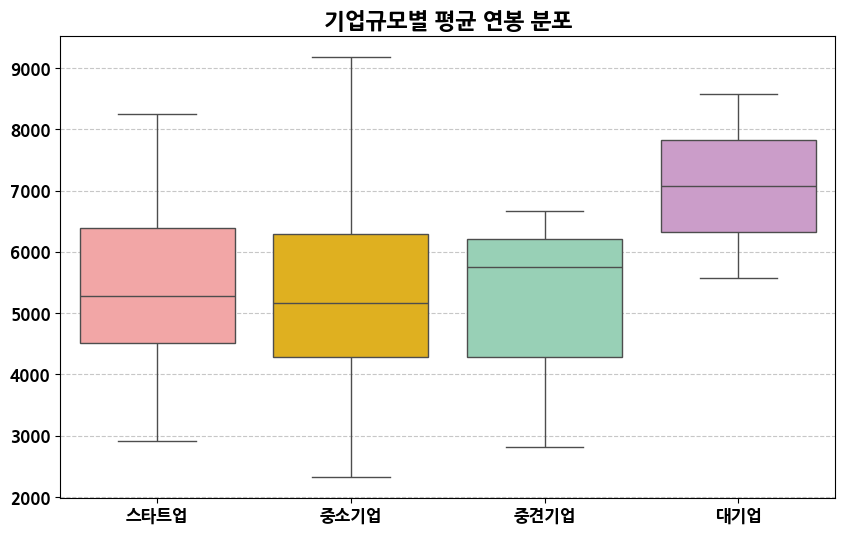

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 생성
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="기업규모", y="평균연봉(천만)", palette=colors)

# y축 라벨 90도 회전 및 폰트 크기와 굵기 설정
plt.ylabel("")
# plt.ylabel("(만)", rotation=90, fontsize=14, fontweight="bold")
plt.xlabel("", fontsize=14, fontweight="bold")

# 제목 추가
plt.title("기업규모별 평균 연봉 분포", fontsize=16, fontweight="bold")

# 눈금 폰트 크기와 굵기 설정
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# 격자선 설정
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


/tmp/ipykernel_20312/733194064.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="기업규모", y="평균연봉(천만)", palette=colors)
/tmp/ipykernel_20312/733194064.py:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(data=df, x="기업규모", y="평균연봉(천만)", palette=colors)


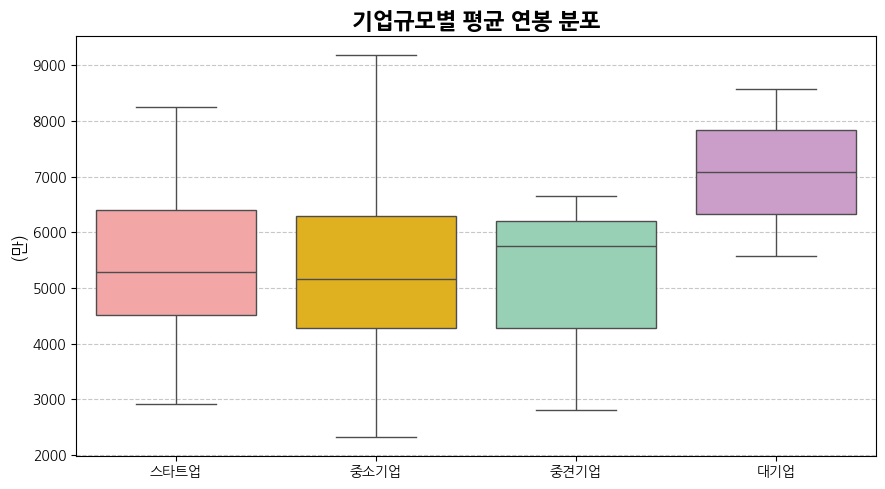

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 생성
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="기업규모", y="평균연봉(천만)", palette=colors)

# y축 라벨 90도 회전
plt.ylabel("(만)", rotation=90, fontsize=12)
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("기업규모별 평균 연봉 분포", fontsize=16, fontweight="bold")

# 그래프를 좌측 위로 이동
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.9)  # 여백 조정

plt.show()
